In [1]:
!pip install torchaudio
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
import librosa.display


     |████████████████████████████████| 1.9 MB 5.0 MB/s 


In [3]:
class AudioUtil():
  # ----------------------------
  # Load an audio file. Return the signal as a tensor and the sample rate
  # ----------------------------
  def open(audio_file):
    sig,sr = torchaudio.load(audio_file)
    return (sig,sr)
   # converting into channels
  def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

In [19]:
# loading an audio file
audioutil = AudioUtil()
filename='SWH_05_20101106_16k_emission_swahili_05h30_06h00_tu_20101106_part5.wav'

In [20]:
aud = audioutil.open(filename)

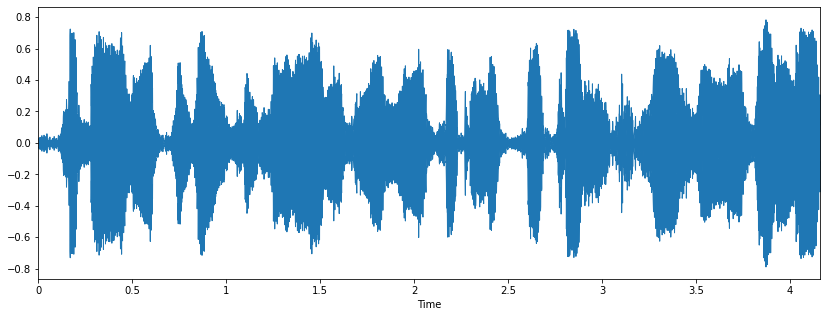

In [21]:
# plotting the wave plot
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [24]:
# since we want to change our file to stereo, we will assign the channel to be  2
channel= 2


In [17]:
def rechannel(aud, new_channel):
    sig, sr = aud

    if (sig.shape[0] == new_channel):
      # Nothing to do
      return aud

    if (new_channel == 1):
      # Convert from stereo to mono by selecting only the first channel
      resig = sig[:1, :]
    else:
      # Convert from mono to stereo by duplicating the first channel
      resig = torch.cat([sig, sig])

    return ((resig, sr))

In [27]:
rechannel(aud,channel)

(tensor([[-0.0151, -0.0174, -0.0173,  ..., -0.0139, -0.0138, -0.0216],
         [-0.0151, -0.0174, -0.0173,  ..., -0.0139, -0.0138, -0.0216]]), 16000)

In [32]:
# ----------------------------
  # Since Resample applies to a single channel, we resample one channel at a time
  # ----------------------------
def resample(aud, newsr):
    sig, sr = aud

    if (sr == newsr):
      # Nothing to do
      return aud

    num_channels = sig.shape[0]
    # Resample first channel
    resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
    if (num_channels > 1):
      # Resample the second channel and merge both channels
      retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
      resig = torch.cat([resig, retwo])

    return ((resig, newsr)) 

In [33]:
# new sample Rate for all the audio file will be the most common one which is 16000
newsr = 16000

In [34]:
resample(aud,newsr)

(tensor([[-0.0151, -0.0174, -0.0173,  ..., -0.0139, -0.0138, -0.0216]]), 16000)

In [ ]:
# The maximum audio length we have in the data set is 6.15 sec, so we will try to resize 
# all the data to the maximum length.


In [51]:
  # ----------------------------
  # Pad (or truncate) the signal to a fixed length 'max_ms' in milliseconds
  # ----------------------------
  def pad_trunc(aud, max_ms):
    sig, sr = aud
    num_rows, sig_len = sig.shape
    max_len = sr//1000 * max_ms

    if (sig_len > max_len):
      # Truncate the signal to the given length
      sig = sig[:,:max_len]

    elif (sig_len < max_len):
      # Length of padding to add at the beginning and end of the signal
      pad_begin_len = random.randint(0, max_len - sig_len)
      pad_end_len = max_len - sig_len - pad_begin_len

      # Pad with 0s
      pad_begin = torch.zeros((num_rows, pad_begin_len))
      pad_end = torch.zeros((num_rows, pad_end_len))

      sig = torch.cat((pad_begin, sig, pad_end), 1)
      aud = sig,sr
      
    return (aud)

In [49]:
max_ms = 6150

In [52]:
pad_trunc(aud, max_ms)

(tensor([[0., 0., 0.,  ..., 0., 0., 0.]]), 16000)